# Coursework 1: Image filtering

In this coursework I practiced techniques for image filtering.

This notebook is based off the skeleton provided for the coursework.

In [1]:
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

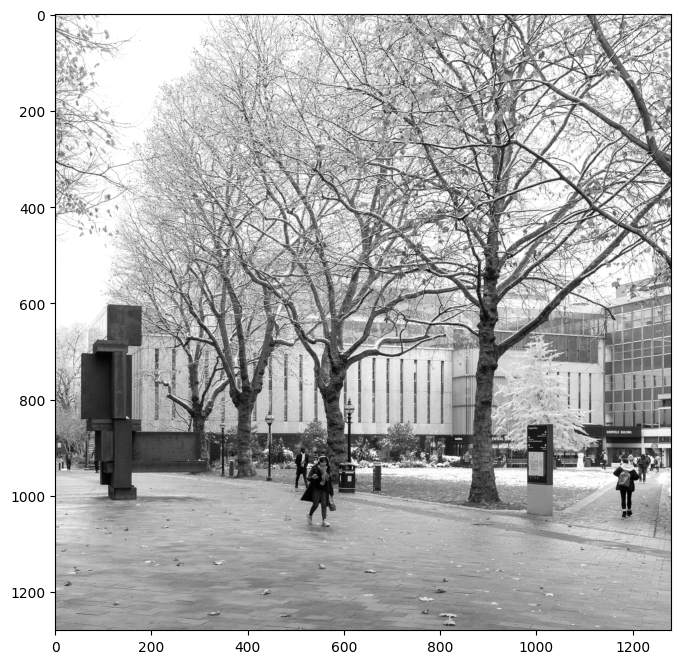

In [2]:
# Read the image (provided)
image = imageio.imread("campus_snow.jpg")
plt.imshow(image, cmap="gray")
plt.gcf().set_size_inches(8, 8)

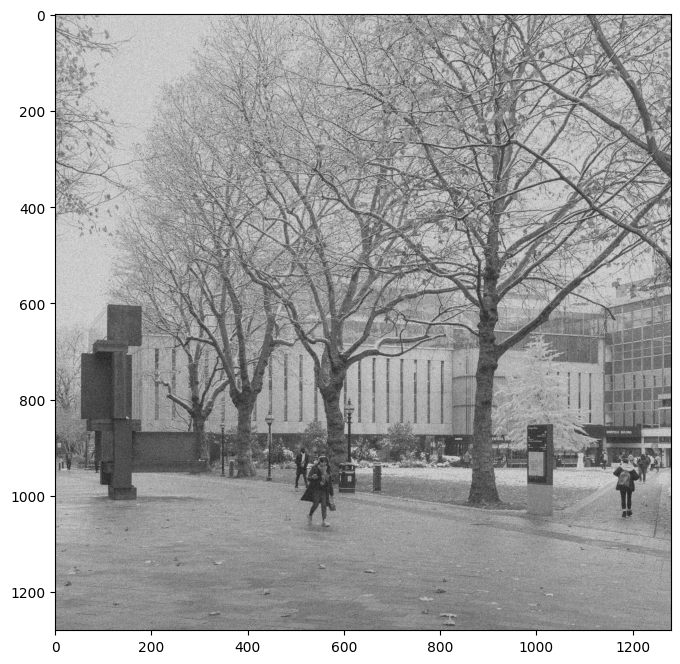

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, "gaussian")
plt.imshow(image_noisy, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


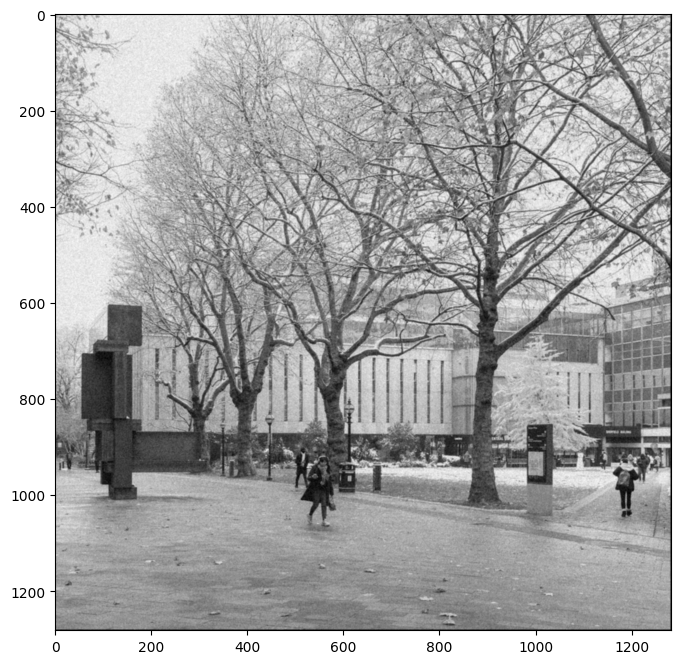

In [4]:
def conv(in1, in2):
    return scipy.signal.convolve2d(in1, in2, mode="full")


def multiconv(in1, filter1, filter2):
    return conv(conv(in1, filter1), filter2)


# Design the filter h
### Insert your code ###


def moving_avg_filter_1d(n: int) -> list[list[int]]:
    """Generates a n x 1 moving average filter"""
    return np.array([[1 / n for _ in range(1, n + 1)]])


def moving_avg_filter_2d(n: int) -> list[list[int]]:
    """Generates a n x n moving average filter"""
    h_1d = moving_avg_filter_1d(n)
    return conv(h_1d, h_1d.T)


h = moving_avg_filter_2d(3)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = conv(image_noisy, h)

# Print the filter (provided)
print("Filter h:")
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

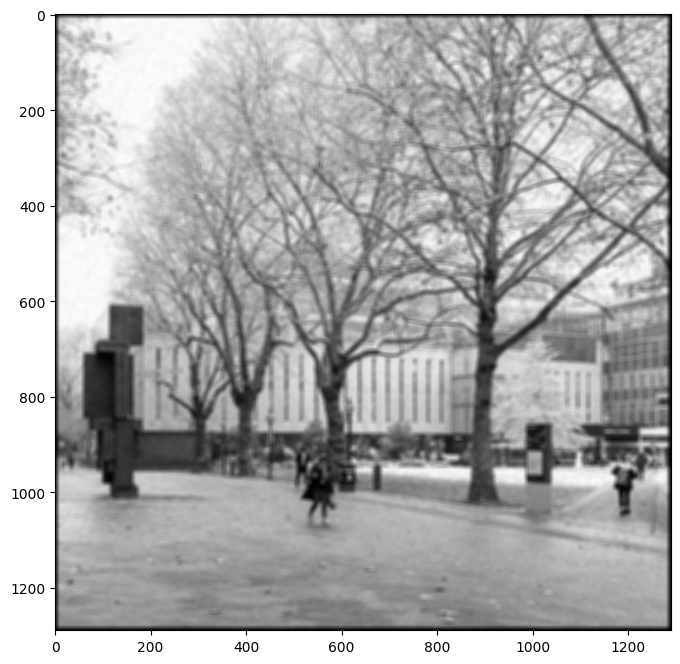

In [5]:
# Design the filter h
### Insert your code ###
h = moving_avg_filter_2d(11)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print("Filter h:")
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

The larger the kernel size the stronger the blurring effect. This is as you are averaging over larger and larger values, so each pixel accounts for components from progressively larger and
larger regions, and so the component corresponding to the original region gets proportionally smaller and smaller.

Fine details are lost like this, and also due to using the "full" convolution mode, we have 0 padding which is why the borders get darker the more you blur.

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


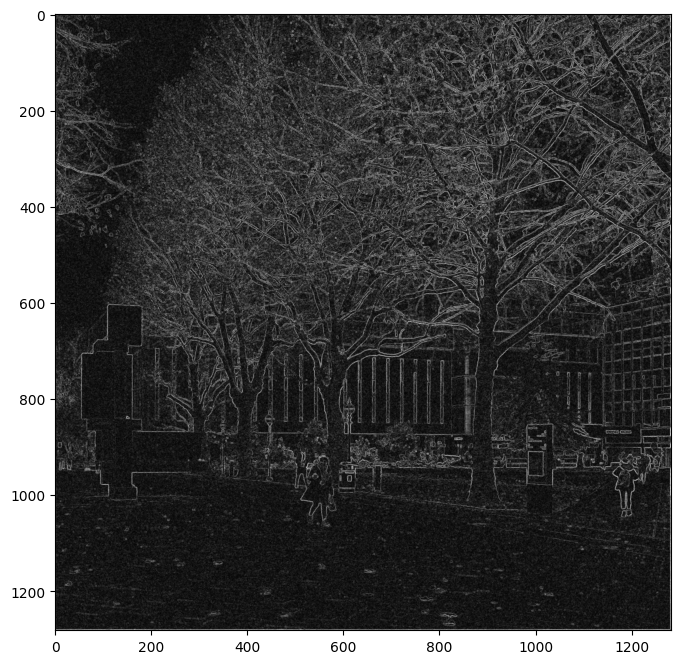

In [6]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = sobel_x.T


# Image filtering
### Insert your code ###
def calc_sobel(image: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    g_x = conv(image, sobel_x)
    g_y = conv(image, sobel_y)
    return g_x, g_y


g_x, g_y = calc_sobel(image_noisy)

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(g_x**2 + g_y**2)

# Print the filters (provided)
print("sobel_x:")
print(sobel_x)
print("sobel_y:")
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

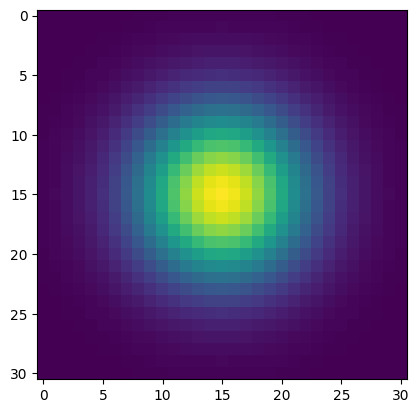

In [7]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel

    k = 3  # values past 3/4 sigma are insignificant, I select 3 sigma
    std_devs = k * sigma
    normalisation_factor = 2 * np.pi * sigma**2

    h = np.zeros((std_devs * 2 + 1, std_devs * 2 + 1))
    for i in range(-std_devs, std_devs + 1):
        for j in range(-std_devs, std_devs + 1):
            h[i + std_devs][j + std_devs] = (
                1 / normalisation_factor * np.exp(-(i**2 + j**2) / (2 * sigma**2))
            )
    return h / h.sum()


# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Elapsed time: 1917.762458ms


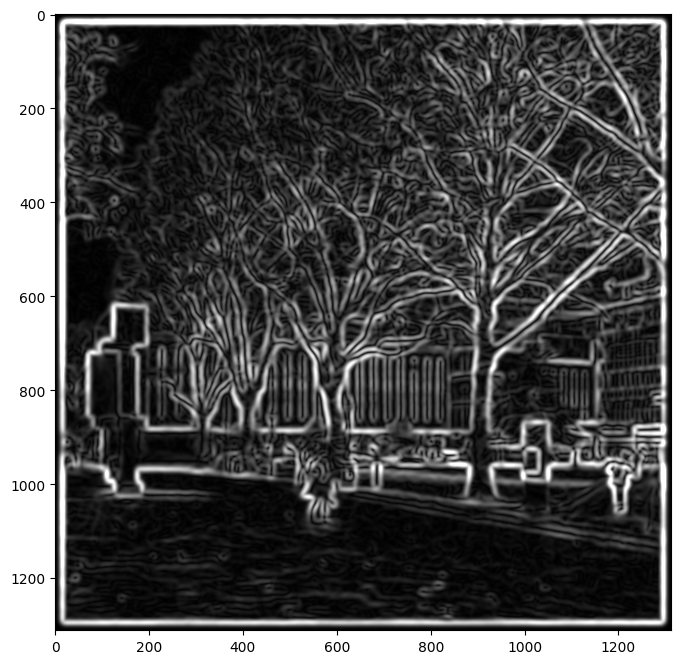

In [8]:
# Construct the Gaussian filter
### Insert your code ###
sigma = 5
gaussian_filter = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
### Insert your code ###
start = time.perf_counter_ns()
smoothed = conv(image_noisy, gaussian_filter)
print(f"Elapsed time: {(time.perf_counter_ns() - start)/(10**6)}ms")

# Image filtering
### Insert your code ###
g_x, g_y = calc_sobel(smoothed)

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(g_x**2 + g_y**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap="gray", vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

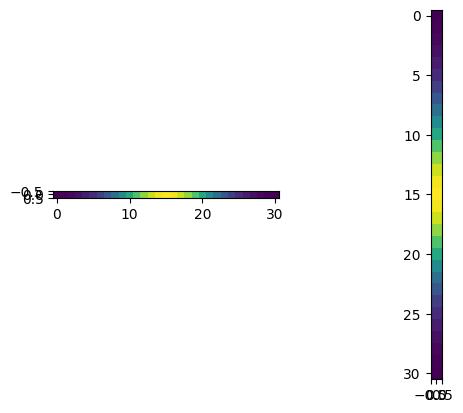

In [9]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel

    ### Insert your code ###
    k = 3  # values past 3/4 sigma are insignificant, I select 3 sigma
    std_devs = k * sigma
    normalisation_factor = np.sqrt(2 * np.pi * sigma**2)

    h = np.zeros((std_devs * 2 + 1, 1))
    for i in range(-std_devs, std_devs + 1):
        h[i + std_devs] = 1 / normalisation_factor * np.exp(-(i**2) / (2 * sigma**2))
    return (h / h.sum()).T


# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = h_x.T

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Elapsed time: 277.917458ms
Mean difference between grad_mag and grad_mag2: 6.5762915520773476e-15


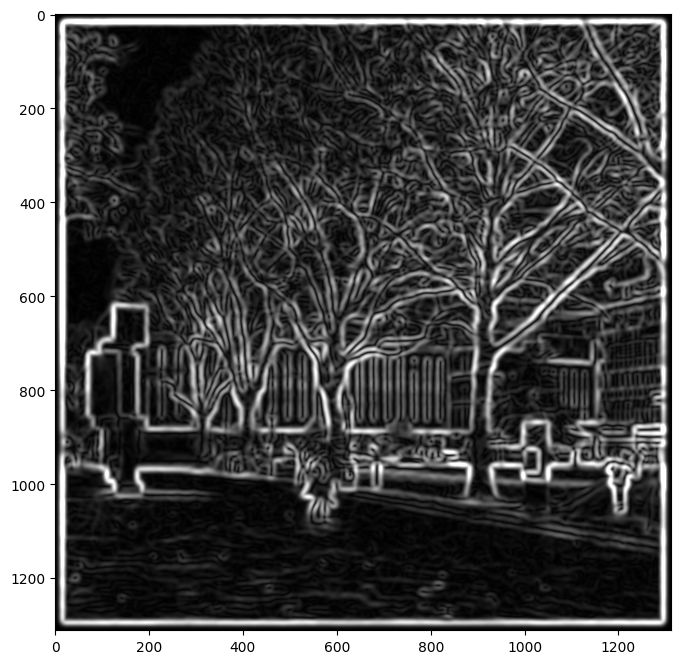

In [11]:
# Perform separable Gaussian smoothing and count time
start = time.perf_counter_ns()
smoothed = multiconv(image_noisy, h_x, h_y)
print(f"Elapsed time: {(time.perf_counter_ns() - start)/(10**6)}ms")

# Image filtering
g_x, g_y = calc_sobel(smoothed)

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(g_x**2 + g_y**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap="gray", vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
mean_diff = np.mean(grad_mag - grad_mag2)
print(f"Mean difference between grad_mag and grad_mag2: {mean_diff}")

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

Using Gaussian before applying the Sobel made it so that the finer details were lost, but emphasised the larger features and got rid of a lot of noise from the signal
(i.e the random noise in the background of the image).
Since the larger scale edges are more clear to see, and the finer edges have been smoothed out, the overall shape of the scene is easier to see with the outline of the ALERT figure being clearer.
Applying smoothing with the 2D kernel increased the computational time a lot.

The complexity of convolving 2 2D matrices is $O(N^2K^2)$, where N is the width/height of the image and K is the kernel width/height.

There are $N^2K^2$ multiplications and $N^2(K^2 - 1)$ summations so with a kernel of 31x31 and an image of 1280x1280, it contributes a significant amount to the computational complexity - with 1574502400 multiplications and 1572864000 summations.

By using separable filtering with 2 1D kernels instead, the overall complexity is on the order of O(N^2*K) instead, with $2N^2 K$ multiplications and $2N^2(K - 1)$ summations. Which brings us down to 101580800 multiplications and 98304000 summations, per convolution, so by applying the 2 1D filters for both the horizontal and vertical blurring, we get ~7x fewer overall computations and should see that reflected in how long it took to smooth the image. Clearly also since the error is miniscule (<$10^{-9}$) it is also safe to say that they also have the same effect.

This indeed is reflected in how long they took, with the separable filtering taking only 435.6ms whereas the previous 2D filter took 3024.6ms - a ~6.94x speedup, which is close to how much I estimated above.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [11]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [12]:
# Expand the dimension of the numpy array
w, h = image_noisy.shape
noisy_multidim = np.reshape(image_noisy, (1, 1, w, h))

# Convert to a Pytorch tensor using torch.from_numpy
tensor = torch.from_numpy(noisy_multidim)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

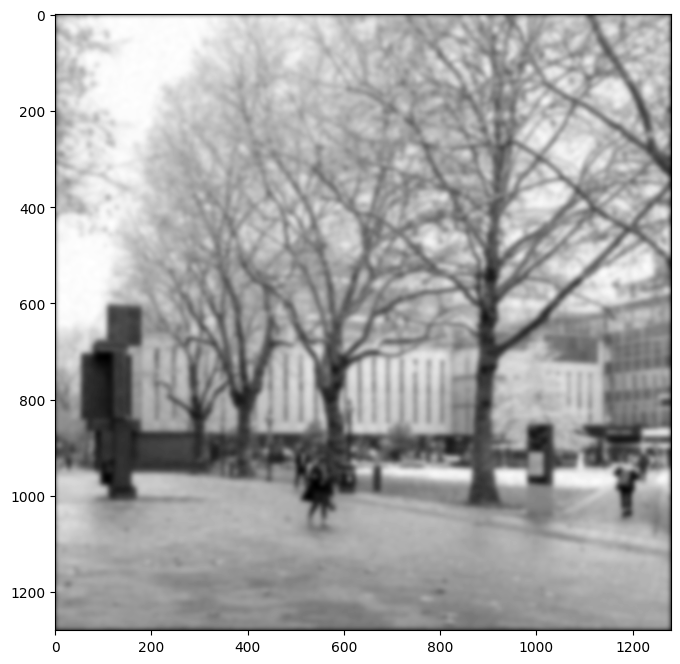

In [13]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)


# Create the Conv2D filter
def filter_to_conv_layer(filter):
    kern_w, kern_h = filter.shape
    conv_shape = (1, 1, kern_w, kern_h)
    filter_tensor = torch.from_numpy(np.reshape(filter, conv_shape))
    conv2d_filter = torch.nn.Conv2d(1, 1, (kern_w, kern_h), padding="same")

    with torch.no_grad():
        conv2d_filter.weight.copy_(filter_tensor)
    return conv2d_filter


# Convert a tensor to a displayable array
def tensor_to_arr(tensor):
    return tensor[0, 0, :, :]


# Pass tensor through convolutional layer
def pass_through_layer(conv_layer, tensor):
    with torch.no_grad():
        return conv_layer(tensor.float())


conv2d_filter = filter_to_conv_layer(h)
image_filtered = pass_through_layer(conv2d_filter, tensor)

# Display the filtering result (provided)
plt.imshow(tensor_to_arr(image_filtered), cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

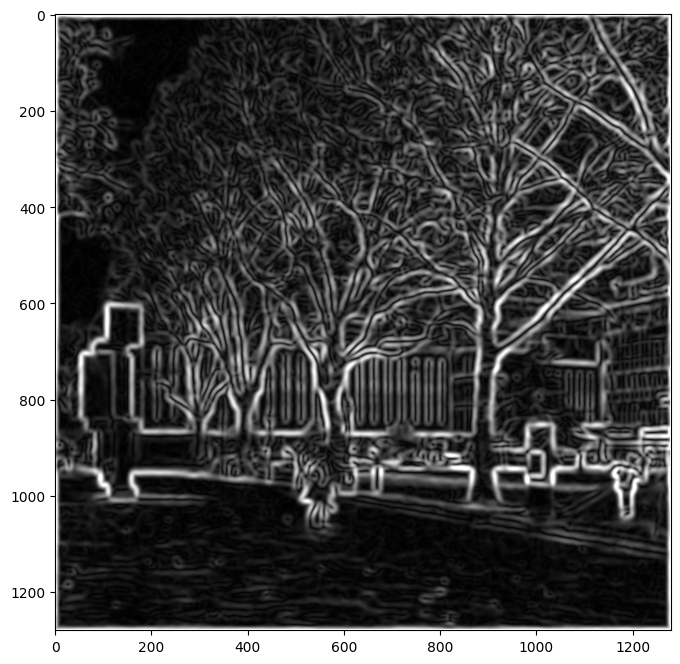

In [14]:
# Create Conv2D filters
conv2d_sobel_x = filter_to_conv_layer(sobel_x)
conv2d_sobel_y = filter_to_conv_layer(sobel_y)

# Perform filtering
g_x = pass_through_layer(conv2d_sobel_x, image_filtered)
g_y = pass_through_layer(conv2d_sobel_y, image_filtered)

# Calculate the gradient magnitude map
grad_mag3 = torch.sqrt(g_x**2 + g_y**2)

# Visualise the gradient magnitude map (provided)
plt.imshow(tensor_to_arr(grad_mag3), cmap="gray", vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)